## Investigation into MNIST dataset ##
The purpose of this exercise is to train a neural network on the MNIST handwriten digit dataset using the TensorFlow and Keras packages. The dataset contains a large amount of images of handwritten digits with labels of the correct digit written. The neural network should be able to read an image and output the correct digit in the image.

In [1]:
#importing needed libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras

The MNIST data set needs to be imported and a function that adds noise to each pixel in a given image needs to be made.

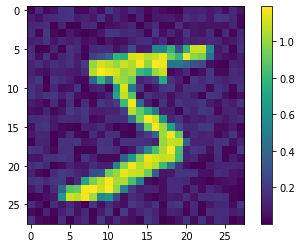

In [2]:
# the training and testing images and labels are loaded into variables
mnist = keras.datasets.mnist
(train_imgs, train_labels), (test_imgs, test_labels) = mnist.load_data()

#rescaling the pixel values in the images to have values between 0-1
train_imgs=train_imgs/255.0
test_imgs=test_imgs/255.0


def noiseImg(img,yNoise):
  ''' inputs: img - the image which noise will be added to, yNoise - upper bound of the noise function
  outputs: the image with added noise from a uniform distribution of range from 0 - yNoise'''
  uniformNoise = yNoise * np.random.random(img.shape)
  return img + uniformNoise


# a test to see how the noise affects an image
yNoise = 0.2
plt.imshow(noiseImg(train_imgs[0],yNoise))
plt.colorbar()

Now a neural netework will be made using the Keras package. The first layer will flatten the amage into a one dimensional array, then the hidden layer(s) which will have parameters for the number of nodes and the activation function and the last layer has an output of 10 nodes corresponding to the posible numbers 0-9

In [3]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # flattens input
    keras.layers.Dense(128,activation='relu'), # hidden layer
    keras.layers.Dense(10) # output nodes
])

The model is then compiled with parameters for the loss function, the optimiser and the metric. I used the 'adam' optimiser as it is adaptive and so performs better than the SGD.

In [4]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer='adam',
              metrics=['accuracy'])

The model now needs to be trained on the dataset:


Text(0, 0.5, 'Accuracy')

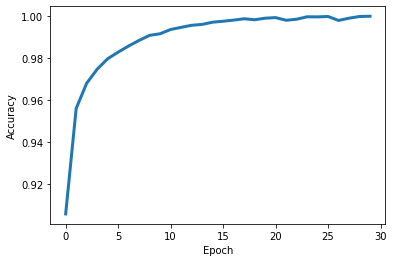

In [5]:
history = model.fit(train_imgs, train_labels,batch_size=100, epochs=30,verbose = 0)

# plots the accuracy and epoch
plt.figure()
plt.plot(history.history['accuracy'], linewidth=3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Each epoch the accuracy improved then plateaued near 1.0 which is expected as this is the training data so it knows the correct answer.

Now the trained neural network is tested on the testing data from the dataset:

In [6]:
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.0929 - accuracy: 0.9804
Test accuracy: 0.980400025844574


The accuracy on the test data was over 95%

Now the noise function will be implemented on the test images multiple times with different values for yNoise and then the model will evaluate over these test images. A graph of yNoise vs the accuracy will be plotted

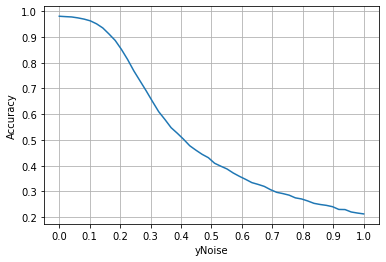

In [7]:
numY = 50 # number of yNoise values being used
ynoise = np.linspace(0,1,numY) # creates array evenly spaced of ynoise values
accuracy = np.empty(numY) # creates empty array the same shape as the ynoise array


# loops over the number of yNoise values
for i in range(numY):
  # calculates the test accuracy on the test images put through the noise function
  accuracy[i] = model.evaluate(noiseImg(test_imgs,ynoise[i]),  test_labels, verbose=0)[1]


# plots the accuracy array with the ynoise array
plt.figure()
plt.plot(ynoise,accuracy)
plt.xlabel('yNoise')
plt.xticks(np.arange(min(ynoise), max(ynoise)+0.1, 0.1)) # increases the number of visible values on the x axis 
plt.ylabel('Accuracy')
plt.grid() # puts grid on the plot

There is a general downward trend to the data, accuracy decreases as yNoise increases. Inbetween yNoise values of 0.0 and ~0.15 the decrease isnt too much and the accuracy remains above 95%. After that it quite sharply decreases to yNoise = 0.4 then still decreases but slower towads yNoise = 1. The increase in noise makes it harder for the neural network to identify the digits so the accuracy decreases. 

Now noise will be added to the sample data and the network will be retrained on this data.

Text(0, 0.5, 'Accuracy')

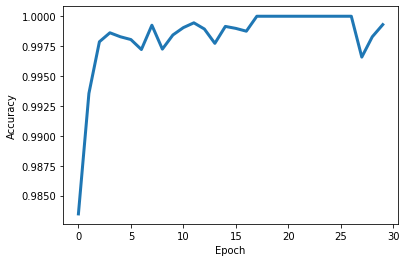

In [8]:
yNoise = 0.3
history = model.fit(noiseImg(train_imgs,yNoise), train_labels,batch_size=100, epochs=30,verbose = 0)

#plots the epoch and accuracy
plt.figure()
plt.plot(history.history['accuracy'], linewidth=3)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

The accuracy sharply increases at the start then jumps around at a high accuracy, this is likely due to the noise affecting the data.

The noise funtion is used on the testing data again with the newly trained network. A graph of yNoise vs the accuracy will be plotted.

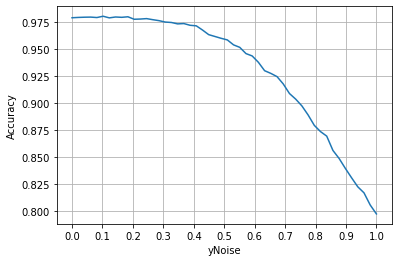

In [9]:
numY = 50 # number of yNoise values being used
ynoise = np.linspace(0,1,numY) # creates array evenly spaced of ynoise values
accuracy = np.empty(numY) # creates empty array the same shape as the ynoise array


# loops over the number of yNoise values
for i in range(numY):
  # calculates the test accuracy on the test images put through the noise function
  accuracy[i] = model.evaluate(noiseImg(test_imgs,ynoise[i]),  test_labels, verbose=0)[1]


# plots the accuracy array with the ynoise array
plt.figure()
plt.plot(ynoise,accuracy)
plt.xlabel('yNoise')
plt.xticks(np.arange(min(ynoise), max(ynoise)+0.1, 0.1)) # increases the number of visible values on the x axis 
plt.ylabel('Accuracy')
plt.grid() # puts grid on the plot

With a yNoise value of 0.3 on the training data, the accuracy for the testing data stayed above 95% all the way until the yNoise was around 0.55. This is a much higher accuracy than the network trained on the original training data  at the same yNoise. Although the accuracy of the training data fluctuated around the 97% mark so this could suggest over fitting with the test data. The added noise to the training data meant it was better trained to detect the digits with noise added. 

Trying a higher value for yNoise in the training data:

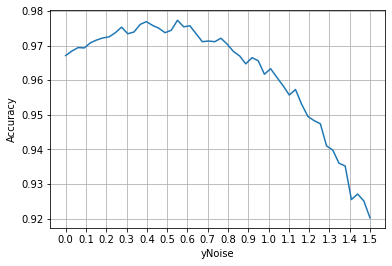

In [37]:
#training network with higher noise
yNoise = 0.9
history = model.fit(noiseImg(train_imgs,yNoise), train_labels,batch_size=100, epochs=30,verbose = 0)

numY = 50 # number of yNoise values being used
ynoise = np.linspace(0,1.5,numY) # creates array evenly spaced of ynoise values
accuracy = np.empty(numY) # creates empty array the same shape as the ynoise array


# loops over the number of yNoise values
for i in range(numY):
  # calculates the test accuracy on the test images put through the noise function
  accuracy[i] = model.evaluate(noiseImg(test_imgs,ynoise[i]),  test_labels, verbose=0)[1]


# plots the accuracy array with the ynoise array
plt.figure()
plt.plot(ynoise,accuracy)
plt.xlabel('yNoise')
plt.xticks(np.arange(min(ynoise), max(ynoise)+0.1, 0.1)) # increases the number of visible values on the x axis 
plt.ylabel('Accuracy')
plt.grid() # puts grid on the plot

With a yNoise value of 0.9 on the training data it has shown that increasing the noise on the training data allows for greater accuracy at higher yNoise on the test data. However the accuracy for low noise was lower than for higher noises.

In order to say what noise value on the training data gives the best performance, performance must be defined. 

If performance was defined by the amount of noise added where its still able to determine the numbers with high enough accuracy then it would suggest a high value for yNoise on the training data would be best. However with a noise value thats too high the training data will be indecipherable even by people as shown below:

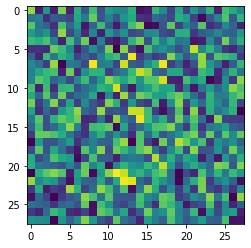

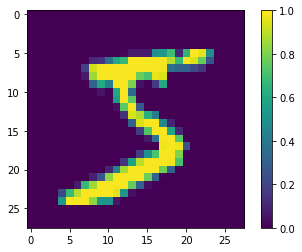

In [33]:
# a test to see how the noise affects an image
yNoise = 5
plt.imshow(noiseImg(train_imgs[0],yNoise)) # image with noise
plt.figure()
plt.imshow(train_imgs[0]) # image with no noise
plt.colorbar()

Even if this gave a high accuracy it would be pointless as it is just fitting noise to noise. 

With the noise value of 0.9 above it showed that at low noise values in the test data it was less accurate than with some noise to a point. This again suggests not good performance as it would be desirable to have just as high a accuracy for low noise as to high noise. 

Adding a small amount of noise to the training data means the network is better at getting the digits even with noise on the test. This means a good performance if the purpose of the neural network was to be able to read images of digits that have a uniform distribution of noise over them. However if the purpose of this network is to be able to read a vast array of different styles of writing these digits then being able to read through a uniform ditribution may not help. The variance in handwriting is not very well modelled by a uniform distribution of the pixel values. The handwriting variance is more complex and would mean that a way to increase the accuracy further is to use more data for training. 